<a href="https://colab.research.google.com/github/AnikaitLakhotia/Machine-Learning/blob/main/CIFAR_10_with_ResNet_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
# Load CIFAR-10 data
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [3]:
# Preprocess input data
x_train = preprocess_input(x_train_full)
x_test = preprocess_input(x_test)

In [4]:
# Callbacks
reduce_on_plateau = keras.callbacks.ReduceLROnPlateau(
 monitor='val_loss',
 factor=0.1,
 patience=3)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
 restore_best_weights=True)

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [5]:
# Model architecture
base = ResNet50(include_top=False, weights='imagenet', input_shape=x_train.shape[1:])

for layer in base.layers[:-1]:
    layer.trainable = False

x = base.output
x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

pred = Dense(10, activation='softmax')(x)

model = Model(inputs=base.input, outputs=pred)

In [6]:
# Compile the model
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train_full, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping_cb, reduce_on_plateau])

Epoch 1/100
782/782 [==============================] - 29s 19ms/step - loss: 1.5637 - accuracy: 0.4892 - val_loss: 1.1388 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 13s 16ms/step - loss: 1.2564 - accuracy: 0.5777 - val_loss: 1.1097 - val_accuracy: 0.6258 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - 14s 17ms/step - loss: 1.1875 - accuracy: 0.6008 - val_loss: 1.0517 - val_accuracy: 0.6440 - lr: 0.0010
Epoch 4/100
782/782 [==============================] - 13s 16ms/step - loss: 1.1566 - accuracy: 0.6153 - val_loss: 1.0381 - val_accuracy: 0.6503 - lr: 0.0010
Epoch 5/100
782/782 [==============================] - 14s 18ms/step - loss: 1.1205 - accuracy: 0.6276 - val_loss: 1.0357 - val_accuracy: 0.6536 - lr: 0.0010
Epoch 6/100
782/782 [==============================] - 13s 16ms/step - loss: 1.1129 - accuracy: 0.6323 - val_loss: 1.0367 - val_accuracy: 0.6484 - lr: 0.0010
Epoch 7/100
782/782 [==============================]

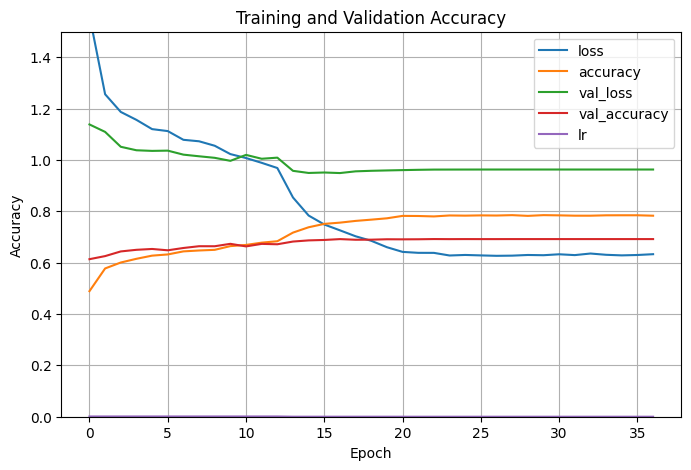

In [8]:
# Plot Metrics
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()